1. Read the file ex2.csv

In [134]:
import pandas as pd

In [135]:
data = pd.read_csv("data.csv")

2. Fill the missing values in the data using the appropriate methods

In [136]:
data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11503 non-null  float64
 5   Engine Cylinders   11411 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Drop "Market Category".

In [138]:
data = data.drop(["Market Category"], axis=1)

Drop NaN Values in "Number of Doors", "Engine Cylinders" and "Engine Fuel Type" columns.

In [139]:
data = data.dropna(subset=["Number of Doors", "Engine Cylinders", "Engine Fuel Type"])

In [140]:
grp = data.groupby(["Vehicle Style", "Vehicle Size"])
grp.max()

Make                  Model  Year  \
Vehicle Style       Vehicle Size                                               
2dr Hatchback       Compact               Volvo                     tC  2017   
                    Midsize             Pontiac               Firebird  2002   
2dr SUV             Compact              Suzuki                   X-90  2017   
                    Midsize                Ford             Ramcharger  2003   
4dr Hatchback       Compact          Volkswagen                     xD  2017   
                    Large                   BMW  5 Series Gran Turismo  2017   
                    Midsize                Saab                    ZDX  2017   
4dr SUV             Compact          Volkswagen           XV Crosstrek  2017   
                    Large                 Volvo               Yukon XL  2017   
                    Midsize               Volvo                 Xterra  2017   
Cargo Minivan       Compact              Nissan               Vanwagon  2017   
                    Large         Mercedes-Benz           Safari Cargo  2016   
                    Midsize                Ford         Windstar Cargo  2008   
Cargo Van           Compact                 GMC                Vandura  2003   
                    Large                   GMC                Vandura  2016   
                    Midsize                 GMC                Vandura  2016   
Convertible         Compact               Volvo                     Z8  2017   
                    Large           Rolls-Royce                S-Class  2017   
                    Midsize              Toyota                 Virage  2017   
Convertible SUV     Compact              Suzuki                 Vitara  2017   
                    Midsize              Nissan  Murano CrossCabriolet  2014   
Coupe               Compact          Volkswagen                   Z4 M  2017   
                    Large           Rolls-Royce                 Wraith  2017   
                    Midsize               Volvo                 Virage  2017   
Crew Cab Pickup     Compact              Toyota                 Tacoma  2017   
                    Large                Toyota                 Tundra  2017   
Extended Cab Pickup Compact              Toyota                  Truck  2017   
                    Large                Toyota                 Tundra  2017   
Passenger Minivan   Compact              Toyota                Venture  2017   
                    Large            Volkswagen                Voyager  2017   
                    Midsize          Volkswagen               Windstar  2017   
Passenger Van       Compact                 GMC              Ram Wagon  2002   
                    Large                   GMC          Transit Wagon  2017   
                    Midsize                 GMC          Transit Wagon  2017   
Regular Cab Pickup  Compact              Toyota                  Truck  2012   
                    Large                Toyota                 Tundra  2017   
Sedan               Compact               Volvo                     iA  2017   
                    Large                 Volvo                    XTS  2017   
                    Midsize               Volvo                 Zephyr  2017   
Wagon               Compact               Volvo                     xB  2017   
                    Large            Oldsmobile               Taurus X  2017   
                    Midsize               Volvo        allroad quattro  2017   

                                                Engine Fuel Type  Engine HP  \
Vehicle Style       Vehicle Size                                              
2dr Hatchback       Compact                     regular unleaded      345.0   
                    Midsize                     regular unleaded      310.0   
2dr SUV             Compact                     regular unleaded      285.0   
                    Midsize                     regular unleaded      230.0   
4dr Hatchback       Compact                     

Fill "Engine HP" with the average of values with similar "Vehicle Type" & "Vehicle Size".

In [141]:
data["Engine HP"] = grp["Engine HP"].transform(lambda x: x.fillna(x.mean()))

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11403 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11403 non-null  object 
 1   Model              11403 non-null  object 
 2   Year               11403 non-null  int64  
 3   Engine Fuel Type   11403 non-null  object 
 4   Engine HP          11403 non-null  float64
 5   Engine Cylinders   11403 non-null  float64
 6   Transmission Type  11403 non-null  object 
 7   Driven_Wheels      11403 non-null  object 
 8   Number of Doors    11403 non-null  float64
 9   Vehicle Size       11403 non-null  object 
 10  Vehicle Style      11403 non-null  object 
 11  highway MPG        11403 non-null  int64  
 12  city mpg           11403 non-null  int64  
 13  Popularity         11403 non-null  int64  
 14  MSRP               11403 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


3. Check for outliers in the numeric data. Remove all the outliers present.

In [143]:
def get_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q2 = data[col].quantile(0.50)
    q3 = data[col].quantile(0.75)
    return q1, q2, q3, q3 - q1 # Inter-quartile range

Find numeric columns in dataset.

In [144]:
numeric_cols = []

for i in range(len(data.dtypes)):
    if data.dtypes[i] in ['float64', 'int64']:
        numeric_cols.append(data.columns[i])

numeric_cols

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

Delete row if it has an outlier value in ANY 1 of the numeric columns.

In [145]:
for col in numeric_cols:
    q1, q2, q3, iqr = get_iqr(data, col)
    data = data[data[col] < (q3 + 1.5 * iqr)]
    data = data[data[col] > (q1 - 1.5 * iqr)]

4. List down the number of unique values in each categorical column present in
the data.

Find categorical columns in dataset.

In [146]:
categorical_cols = []

for i in range(len(data.dtypes)):
    if data.dtypes[i] == 'object':
        categorical_cols.append(data.columns[i])

categorical_cols

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

In [147]:
print("Column - Number of Unique Values")
for col in categorical_cols:
    print(col, ' - ', len(data[col].unique()))

Column - Number of Unique Values
Make  -  37
Model  -  636
Engine Fuel Type  -  9
Transmission Type  -  4
Driven_Wheels  -  4
Vehicle Size  -  3
Vehicle Style  -  16


5. Find the average engine HP for rear wheel drive with manual transmission
type.

In [148]:
grp = data.groupby(["Driven_Wheels", "Transmission Type"])
grp["Engine HP"].mean()

Driven_Wheels      Transmission Type
all wheel drive    AUTOMATED_MANUAL     271.203571
                   AUTOMATIC            254.284370
                   MANUAL               241.663626
four wheel drive   AUTOMATIC            287.400449
                   MANUAL               188.138906
                   UNKNOWN              190.000000
front wheel drive  AUTOMATED_MANUAL     195.591527
                   AUTOMATIC            204.801309
                   MANUAL               161.338896
                   UNKNOWN              150.000000
rear wheel drive   AUTOMATED_MANUAL     246.461538
                   AUTOMATIC            284.924509
                   MANUAL               251.128322
                   UNKNOWN              259.000000
Name: Engine HP, dtype: float64

In [149]:
print("Average Engine HP with Rear Wheel Drive & Manual Transmission =", grp["Engine HP"].mean()[12])

Average Engine HP with Rear Wheel Drive & Manual Transmission = 251.12832179633156


6. Find the min, max, average of city mpg for different Car make and vehicle
style. (Ex: for BMW Coupe type find the values as given above)

In [150]:
# Group data
grp = data.groupby(["Make", "Vehicle Style"])

# Get values with 'BMW Coupe'
grp = grp.get_group(("BMW", "Coupe"))

print("*** Minimum City MPG ***", grp["city mpg"].min(), sep="\n")
print("\n*** Maximum City MPG ***", grp["city mpg"].max(), sep="\n")
print("\n*** Average City MPG ***", grp["city mpg"].mean(), sep="\n")



*** Minimum City MPG ***
14

*** Maximum City MPG ***
24

*** Average City MPG ***
19.555555555555557


7. Create suitable charts.

In [151]:
import matplotlib.pyplot as plt

In [152]:
numeric_cols

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

Histograms of "Engine HP", "Highway MPG", "City MPG", and "MSRP".

(array([  6.,  29.,  86., 152., 269., 474., 622., 685., 742., 630., 420.,
        341., 439., 496., 439., 594., 622., 364., 276., 240., 204.,  48.,
        174.,  57.,  31.,  56.,   4.,  36.,  29.,  15.]),
 array([ 66.        ,  79.96666667,  93.93333333, 107.9       ,
        121.86666667, 135.83333333, 149.8       , 163.76666667,
        177.73333333, 191.7       , 205.66666667, 219.63333333,
        233.6       , 247.56666667, 261.53333333, 275.5       ,
        289.46666667, 303.43333333, 317.4       , 331.36666667,
        345.33333333, 359.3       , 373.26666667, 387.23333333,
        401.2       , 415.16666667, 429.13333333, 443.1       ,
        457.06666667, 471.03333333, 485.        ]),
 <a list of 30 Patch objects>)

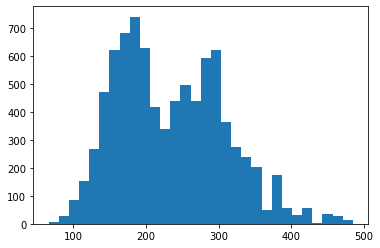

In [206]:
plt.hist(data["Engine HP"], bins=30)

(array([ 14.,  27.,  83., 270., 273., 234., 309., 309., 468., 603., 665.,
        585., 606., 482., 592., 375., 470., 493., 290., 368., 261., 198.,
        186., 159., 107.,  61.,  40.,  29.,  22.,   1.]),
 array([13.        , 14.03333333, 15.06666667, 16.1       , 17.13333333,
        18.16666667, 19.2       , 20.23333333, 21.26666667, 22.3       ,
        23.33333333, 24.36666667, 25.4       , 26.43333333, 27.46666667,
        28.5       , 29.53333333, 30.56666667, 31.6       , 32.63333333,
        33.66666667, 34.7       , 35.73333333, 36.76666667, 37.8       ,
        38.83333333, 39.86666667, 40.9       , 41.93333333, 42.96666667,
        44.        ]),
 <a list of 30 Patch objects>)

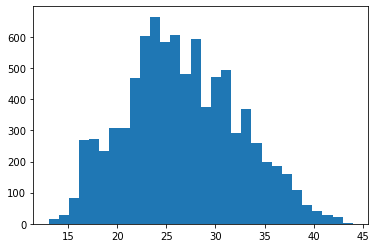

In [207]:
plt.hist(data["highway MPG"], bins=30)

(array([  1.,  61., 122., 340., 380., 625., 801., 964., 822., 688., 666.,
        530., 526., 437., 423., 416., 197., 225., 152., 204.]),
 array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        23., 24., 25., 26., 27., 28., 29., 30.]),
 <a list of 20 Patch objects>)

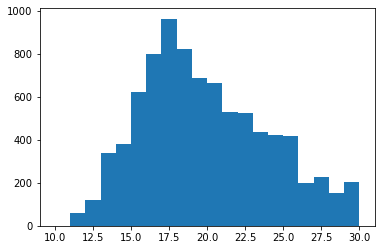

In [208]:
plt.hist(data["city mpg"], bins=20)

(array([747.,  41.,  11.,   4.,   8.,  23.,  54., 165., 244., 263., 371.,
        449., 461., 495., 481., 454., 472., 415., 394., 356., 322., 298.,
        249., 257., 213., 201., 176., 155., 126.,  94., 100.,  68.,  48.,
         69.,  60.,  67.,  64.,  40.,  37.,  28.]),
 array([ 2000. ,  3731.5,  5463. ,  7194.5,  8926. , 10657.5, 12389. ,
        14120.5, 15852. , 17583.5, 19315. , 21046.5, 22778. , 24509.5,
        26241. , 27972.5, 29704. , 31435.5, 33167. , 34898.5, 36630. ,
        38361.5, 40093. , 41824.5, 43556. , 45287.5, 47019. , 48750.5,
        50482. , 52213.5, 53945. , 55676.5, 57408. , 59139.5, 60871. ,
        62602.5, 64334. , 66065.5, 67797. , 69528.5, 71260. ]),
 <a list of 40 Patch objects>)

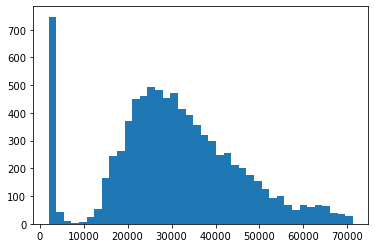

In [209]:
plt.hist(data["MSRP"], bins=40)

Pie chart of "Engine Cylinders".

In [211]:
num_of_cylinders = data.groupby(("Engine Cylinders")).size()
num_of_cylinders

Engine Cylinders
3.0       2
4.0    3745
5.0     195
6.0    3515
8.0    1123
dtype: int64

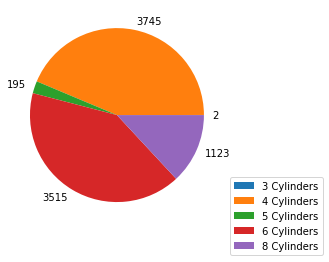

In [243]:
plt.pie(num_of_cylinders, labels=num_of_cylinders)
plt.legend(["3 Cylinders", "4 Cylinders", "5 Cylinders", "6 Cylinders", "8 Cylinders"], bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)

# To avoid legend overlapping with pie chart
# Use: bbox_to_anchor=(1,0), loc="lower right", bbox_transform=plt.gcf().transFigure

In [178]:
categorical_cols

['Make',
 'Model',
 'Engine Fuel Type',
 'Transmission Type',
 'Driven_Wheels',
 'Vehicle Size',
 'Vehicle Style']

Number of vehicles using different "Engine Fuel Type" with different "Vehicle Style".

In [246]:
pd.pivot_table(data, columns="Engine Fuel Type", values="Model", aggfunc=(lambda x:len(x)), index=['Vehicle Style'])
# pivot_table(<DataFrame>, columns=[<Column1>, <column2>, ...], values="<col_to_aggregate", index=['<col_name1>', '<col_name2>'...])
# index = Indexing within pivot table

Engine Fuel Type,diesel,flex-fuel (premium unleaded recommended/E85),flex-fuel (premium unleaded required/E85),flex-fuel (unleaded/E85),flex-fuel (unleaded/natural gas),natural gas,premium unleaded (recommended),premium unleaded (required),regular unleaded
Vehicle Style,,,,,,,,,
2dr Hatchback,NaN,NaN,NaN,NaN,NaN,NaN,91.0,22.0,229.0
2dr SUV,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,42.0
4dr Hatchback,NaN,NaN,NaN,NaN,NaN,NaN,111.0,34.0,344.0
4dr SUV,36.0,2.0,4.0,89.0,NaN,NaN,265.0,251.0,1422.0
Cargo Minivan,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,34.0
Cargo Van,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,46.0
Convertible,13.0,7.0,NaN,3.0,NaN,NaN,175.0,140.0,134.0
Convertible SUV,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,21.0
Coupe,NaN,2.0,NaN,11.0,NaN,NaN,134.0,194.0,358.0


In [247]:
data.corr(method="spearman")

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.285837,-0.123191,0.209545,0.353085,0.341685,0.239506,0.483933
Engine HP,0.285837,1.000000,0.721892,0.071815,-0.457969,-0.550125,0.064542,0.782307
Engine Cylinders,-0.123191,0.721892,1.000000,0.020795,-0.730258,-0.808984,0.015890,0.417563
Number of Doors,0.209545,0.071815,0.020795,1.000000,0.012254,0.028659,-0.060411,0.138239
highway MPG,0.353085,-0.457969,-0.730258,0.012254,1.000000,0.940548,0.055277,-0.163220
city mpg,0.341685,-0.550125,-0.808984,0.028659,0.940548,1.000000,0.061605,-0.227661
Popularity,0.239506,0.064542,0.015890,-0.060411,0.055277,0.061605,1.000000,0.044314
MSRP,0.483933,0.782307,0.417563,0.138239,-0.163220,-0.227661,0.044314,1.000000
